<h1 align=center> XGBoost Regression In Depth </h1>

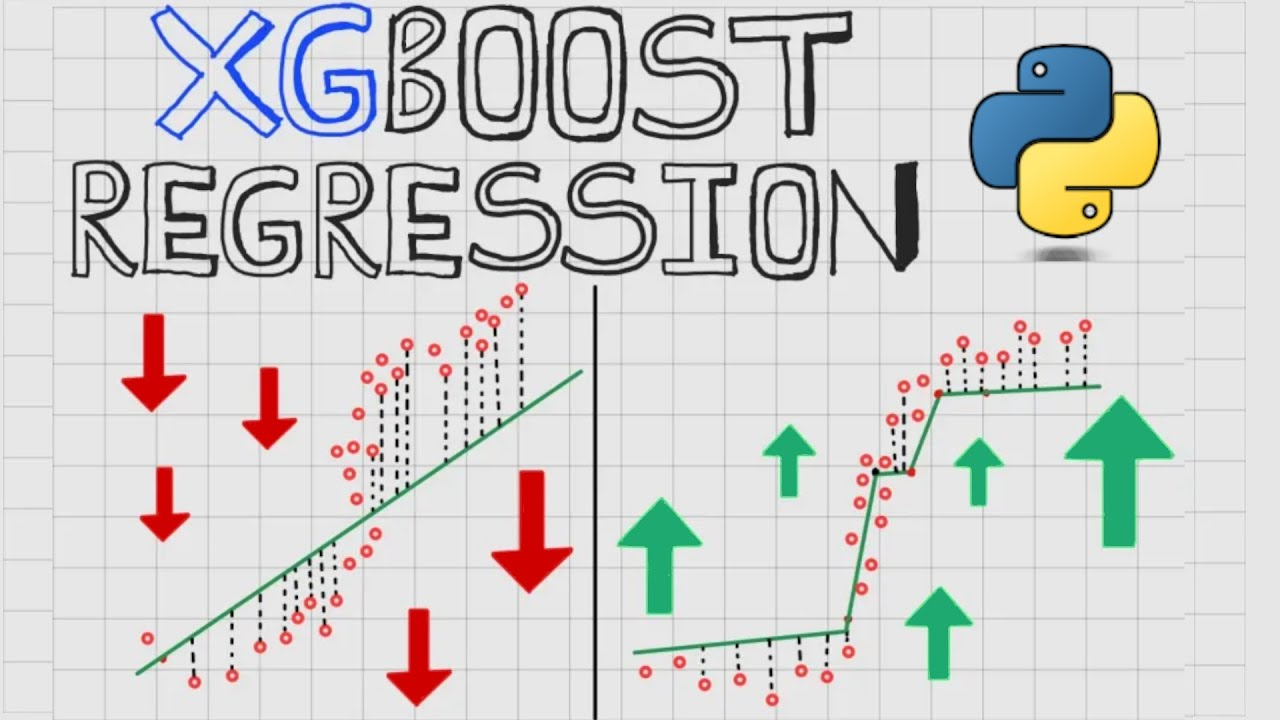

- XGBoost, short for Extreme Gradient Boosting
- Supervised learning algorithm
- XGBoost is used for regression and classification problems
- Do not require feature scaling
- Not sensitive to outliers
- Handling missing values by default
- Decision-tree-based ensemble ML algorithm
- Sequential ensemble learning

### How It Works:

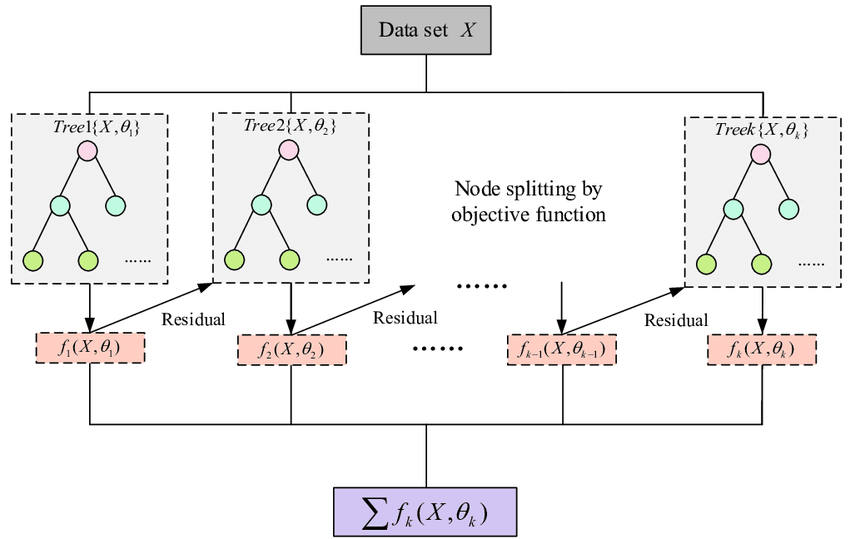

Here's a more detailed look at how XGBoost works:

1. **Initial Prediction:** XGBoost starts by making a simple prediction on the training data, often using the average of the target variable.
2. **Error Calculation:** It then calculates the residuals, which are the differences between the predicted values and the actual values in the training data. Essentially, these residuals represent the errors in the initial prediction.
3. **Building the First Decision Tree:** XGBoost builds the first decision tree in the ensemble. This tree focuses on learning these residuals, aiming to minimize the overall error. To do this, the algorithm finds the best split points in the features that will reduce the errors the most.
4. **Subsequent Trees and Error Correction:** Here's where the magic of gradient boosting happens. XGBoost doesn't discard the previous tree. Instead, it uses the residuals again, but this time for the predictions made by the entire ensemble so far (including the first tree). The new tree specifically targets these remaining errors, further improving the model's accuracy.
5. **Minimizing Loss Function:** Throughout the process, XGBoost optimizes a loss function. This function mathematically measures how well the model's predictions match the actual values. By minimizing the loss function, XGBoost ensures the ensemble is on the right track to make accurate predictions.
6. **Regularization for Complexity Control:** XGBoost incorporates L1 and L2 regularization penalties in the loss function. These penalize models that are too complex, helping to prevent overfitting. Imagine a decision tree with too many branches; it might memorize the training data too well but fail to generalize to new, unseen data. Regularization helps avoid such overly complex models.
7. **Stopping Criteria:** XGBoost adds trees until a certain stopping criteria is met. These criteria could be a maximum number of trees, a minimum improvement in the loss function, or reaching a certain level of accuracy.

### XGBoost Regression Practical Example

- Below is our data
    
    
    | Drug Dosage (mg) | Drug Effectiveness |
    | --- | --- |
    | 10 | -10 |
    | 20 | 7 |
    | 25 | 8 |
    | 35 | -7 |

**Step1: Make Initial Prediction**

- The prediction can be anything, but by default, it is 0.5, regardless of whether you are using XGBoost for regression or classification

**Step2: We Calculate The Residuals (Observed-Predicted)**

- For this example Predicted Value = 0.5, so residuals are listed below

| Drug Dosage (mg) | Drug Effectiveness | Residuals |
| --- | --- | --- |
| 10 | -10 | -10.5 |
| 20 | 7 | 6.5 |
| 25 | 8 | 7.5 |
| 35 | -7 | -7.5 |

**Step3: This Step Can Be Done In The Three Sub-Steps**

1. Part(a): we try different threshold values to construct the tree
2. Part(b): we calculate the similarity score
3. Part(c): we compute the gain, any split with the largest gain, that threshold will be selected

**First(1) The First Branch In Tree:**

**Part(a).1: Build XGboost Regression Tree**

- First, we selected the Dosage<15 and we got the below tree
- `Note:` We got the Dosage<15 by taking the average of the first two lowest dosage ((10+20)/2 = 15)

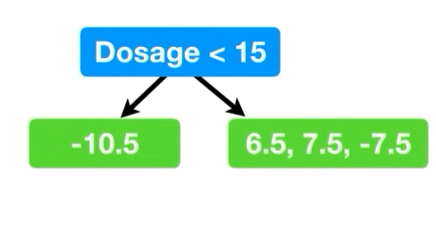

**Part(b).1: Calculate Similarity Score**

- For regression problem, we use the below formula to compute similarity score

$$
Similarity \;Score = \frac {\sum (Residuals)^2}{Number\; Of\; Residuals + \lambda}
$$

- lambda is regularization parameter, for this example we assign lambda=0

$$
Similarity\; Score\; For\; Dosage<15:\\root\_S = \frac {(-10.5+6.5+7.5-7.5)^2}{4+0} = 4\\ left\_S = \frac {(-10.5)^2}{1+0} = 110.25 \\ right\_S = \frac {(6.5+7.5-7.5)^2}{3+0}=14.08
$$

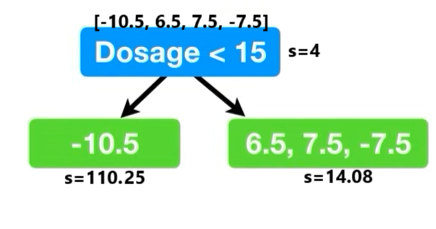

**Part(c).1: Calculate Gain (left_s + right_s — root_s)**

- As we selected Dosage<15 for the first branch in the tree, here we compute Gain
- Gain for Dosage<15 = 110.25 + 14.08 -4 = 120.33
- As we selected Dosage<15 for the first branch in the tree, we need to try different threshold values and repeat part(a), part(b), and part(c). The threshold values with the largest gain will be selected
- We shift the threshold over so that it is the average of the next two observations ((20+25)/2=22.5). The Gain is 4 for Dosage<22.5. We will try the next threshold because the Gain is less than 120.33
- We shift the threshold over so that it is the average of the last two observations ((25+35)/2=30). The Gain is 56.33 for Dosage< 30. Again the Gain is less than 120.33, so we will select the Dosage<15
- `Note` We tried different values to select as threshold for first branch in the tree (e.g. Dosage<22.5 and Dosage<30 ). The threshold Dosage<15 got the largest Gain (120.33) compared to other threshold values, so we will select it for root. Dosage<15 is better at splitting the residual into clusters of similar values.

**Second(2) We check the leaf on the left and in the right to see if we can split it further:**

- As we have only one residual left, we can not split it further
- However, we can split the 3 Residuals in the leaf on the right
- So, we will perform the same operation as we did above

**Part(a).2: Build Tree**

- First select the average of the first two observations, 20 and 25, for which we got 22.5 as the average
- Then, we shifted the threshold value for the last two observations, where we got 30, the average of 25 and 35
- For both we compute the Gain, the one with the largest Gain will be select

`Note:` The Gain for Dosage<22.5 was 28.17, while the Dosage<30 had the largest Gain. For simplicity, we will only show the steps for Dosage<30 as having the largest Gain.

- We split the tree on the right by selecting the threshold Dosage< 30
- Below is our tree


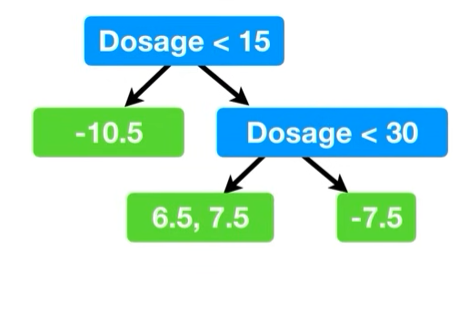

**Part(b).2: Calculate Similarity Score**

$$
Similarity\; Score\; For\;Dosage<30\;(right\;leaf):\\root\_S = \frac {(6.5+7.5-7.5)^2}{3+0} = 14.08\\ left\_S = \frac {(6.5+7.5)^2}{2+0} =  98\\ right\_S = \frac {(-7.5)^2}{1+0}= 56.25
$$

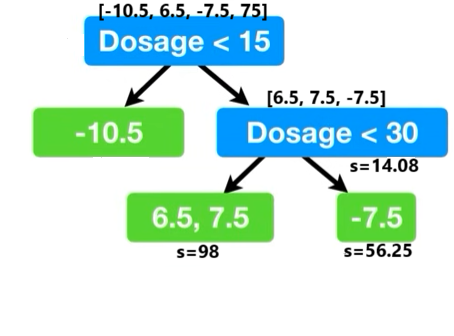

**Part(c).3: Calculate Gain**

- Gain for threshold Dosage< 30 = 98 + 56.25–14.08 = 140.17
- After trying Dosage with having different values, we got that Dosage< 30 has the largest Gain, therefore we will select it as the threshold for this branch

`Note`: For this example, we limited the tree depth to two levels for simplicity. So, we will not split the leaf any further. However, the default is to allow up to 6 levels.

**Step4: Prune The Tree** 

- In XGBoost, pruning is a technique used to reduce the complexity of the model by eliminating parts of the decision trees that do not contribute significantly to the model’s performance. Pruning helps prevent overfitting and enhances the model’s generalization to unseen data
- We prune an XGBoost Tree based on it`s Gain values
- We start by packing a number, for example, 130. XGBoost called this number gamma
- We then calculate the difference between the Gain associated with the lowest branch in the tree (Gain — gamma)
- If the difference between Gain and gamma is negative we will remove the branch, otherwise, we do not remove the branch (Positive)

$$
(Gain-\gamma)\\ 140.17-130=10.17
$$

- As we got positive, we will not remove the branch
- `Note` If we compute the difference between Gain for root and gamma, the difference will be negative. We will not remove the root, because we did not remove the first branch.
- Imagine, if we assign gamma=150, it will remove all the tree (because 140.17–150 is negative, and 120.33–150 is negative), and we will construct the tree again with a different lambda value (In the above example lambda=0)
- So in this example imagine we select the below tree as the best one

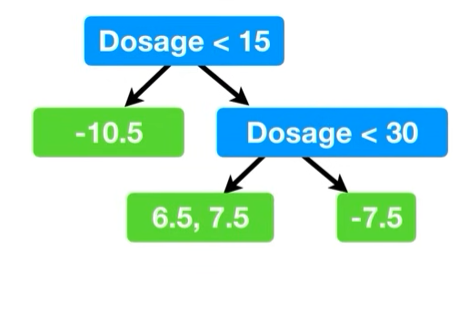

**Step5: Compute Output**

$$
Output = \frac{Sum\;Of\;Residuals}{Number\; Of\; Residuals + \lambda}
$$

- Below are our output values, and our first tree is completed!

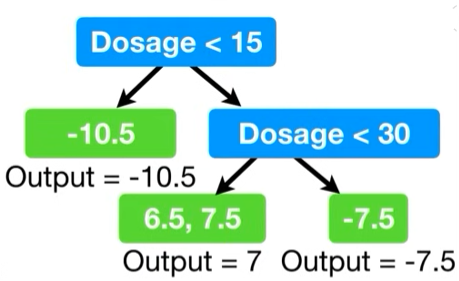

**Step6: New Prediction**

$$
New\_Prediction = Init\_Prediction + learning\_rate * First\_Tree
$$

- Init_Prediction = 0.5
- The learning rate is eta, and the default value is 0.3
- Below is the prediction for the first observation

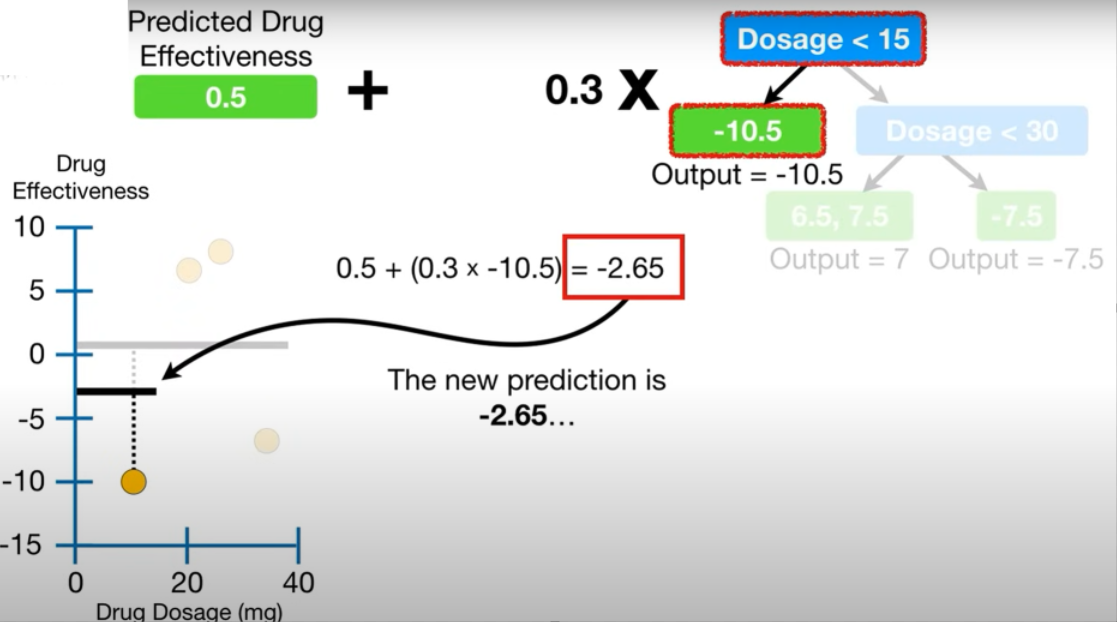

$$
F(x) = 0.5+ (0.3* -10.5) = -2.65\\ F(x) = 0.5+(0.3* 7) = 2.6\\F(x) = 0.5+(0.3* 7) = 2.6\\ F(x) = 0.5+(0.3* -7.5) = -1.75
$$

| Drug Dosage (mg) | Drug Effectiveness | Residuals | New Prediction |
| --- | --- | --- | --- |
| 10 | -10 | -10.5 | -2.65 |
| 20 | 7 | 6.5 | 2.6 |
| 25 | 8 | 7.5 | 2.6 |
| 35 | -7 | -7.5 | -1.75 |

- Next, we will build another tree with new residuals and make prediction, we keep building trees until the residuals are super small, or we have reached the maximum number

### **Pros**

- **High Accuracy:** XGBoost’s ensemble approach of combining multiple models leads to superior accuracy compared to single models like decision trees
- **Scalability:** It’s optimized for handling large datasets and can run efficiently on systems with parallel processing capabilities
- **Flexibility:** XGBoost is a versatile tool that can be used for various tasks, including regression, classification, and ranking problems
- **Interpretability:** While not as easily interpretable as simpler models, XGBoost provides insights into feature importance. This helps understand which factors significantly impact the predictions

### **Cons**

- **Complexity:** Compared to simpler models, XGBoost can be more complex to understand and fine-tune
- **Potential for Overfitting:** While it has built-in regularization, XGBoost can still overfit if not tuned properly. Careful selection of hyperparameters is crucial
- **Memory Usage:** The tree-based structure of XGBoost can consume a significant amount of memory, especially when dealing with large datasets
- **Not ideal for Complex Data:** XGBoost might not perform as well on very high-dimensional or sparse datasets compared to other algorithms

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

X, y = load_diabetes(return_X_y=True)

reg = xgb.XGBRegressor(
    tree_method="hist",
    eval_metric=mean_absolute_error,
)
reg.fit(X, y, eval_set=[(X, y)])

[0]	validation_0-rmse:62.18011	validation_0-mean_absolute_error:52.97310
[1]	validation_0-rmse:52.29877	validation_0-mean_absolute_error:44.36509
[2]	validation_0-rmse:44.78836	validation_0-mean_absolute_error:37.66372
[3]	validation_0-rmse:39.35379	validation_0-mean_absolute_error:32.57304
[4]	validation_0-rmse:35.04855	validation_0-mean_absolute_error:28.78424
[5]	validation_0-rmse:31.14890	validation_0-mean_absolute_error:25.09721
[6]	validation_0-rmse:28.04163	validation_0-mean_absolute_error:22.41000
[7]	validation_0-rmse:25.45296	validation_0-mean_absolute_error:20.22522
[8]	validation_0-rmse:24.05207	validation_0-mean_absolute_error:18.97663
[9]	validation_0-rmse:22.51345	validation_0-mean_absolute_error:17.69308
[10]	validation_0-rmse:20.99114	validation_0-mean_absolute_error:16.28012
[11]	validation_0-rmse:20.58301	validation_0-mean_absolute_error:15.83178
[12]	validation_0-rmse:20.03287	validation_0-mean_absolute_error:15.32764
[13]	validation_0-rmse:19.73968	validation_0-mea

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function mean_absolute_error at 0x00000200748CF420>,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)